<a href="https://colab.research.google.com/github/A-SHIVASAI/A-SHIVASAI/blob/main/Data_analyst_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Replace 'dataset.csv' with the name of your dataset file
df = pd.read_csv('Data_Analyst_Assignment_Dataset.csv')

In [10]:
df.head()

,Amount Pending,State,Tenure,Interest Rate,City,Bounce String,Disbursed Amount,Loan Number
0,963,Karnataka,11,7.69,Bangalore,SSS,10197,JZ6FS
1,1194,Karnataka,11,6.16,Bangalore,SSB,12738,RDIOY
2,1807,Karnataka,14,4.24,Hassan,BBS,24640,WNW4L
3,2451,Karnataka,10,4.70,Bangalore,SSS,23990,6LBJS
4,2611,Karnataka,10,4.41,Mysore,SSB,25590,ZFZUA


In [20]:
def calculate_risk(bounce_string):
    if not bounce_string:
        return "Unknown Risk"
    bounce_behavior = bounce_string[:-1]
    bounce_count = bounce_behavior.count('B') + bounce_behavior.count('L')
    if bounce_string[-1] == 'S' or bounce_string[-1] == 'H':
        if bounce_count == 0:
            return "Low Risk"
    if bounce_count < 2 and bounce_string[-1] != 'B' and bounce_string[-1] != 'L':
        return "Medium Risk"
    return "High Risk"

def label_tenure(delinquency_string):
    # Interpret the delinquency string to determine tenure label
    if len(delinquency_string) >= 3:
        if delinquency_string[2] == 'B' or delinquency_string[2] == 'L':
            return "Early Tenure"
    if len(delinquency_string) <= (df['Tenure'].max() - 3):
        if delinquency_string[-1] == 'B' or delinquency_string[-1] == 'L':
            return "Late Tenure"
    return "Mid Tenure"

# Applying the risk calculator function and tenure label to the respective columns using iloc
risk_categories = []
tenure_labels = []
for index in range(len(df)):
    bounce_string = df.iloc[index]['Bounce String']
    risk_category = calculate_risk(bounce_string)
    risk_categories.append(risk_category)

    tenure_label = label_tenure(bounce_string)
    tenure_labels.append(tenure_label)

# Creating new columns in your DataFrame to store the risk categories and tenure labels
df['risk_category'] = risk_categories
df['tenure_label'] = tenure_labels

# Now, df['risk_category'] contains the risk categories and df['tenure_label'] contains the tenure labels for each customer


In [21]:
df.head()

,Amount Pending,State,Tenure,Interest Rate,City,Bounce String,Disbursed Amount,Loan Number,risk_category,tenure_label
0,963,Karnataka,11,7.69,Bangalore,SSS,10197,JZ6FS,Low Risk,Mid Tenure
1,1194,Karnataka,11,6.16,Bangalore,SSB,12738,RDIOY,High Risk,Early Tenure
2,1807,Karnataka,14,4.24,Hassan,BBS,24640,WNW4L,High Risk,Mid Tenure
3,2451,Karnataka,10,4.70,Bangalore,SSS,23990,6LBJS,Low Risk,Mid Tenure
4,2611,Karnataka,10,4.41,Mysore,SSB,25590,ZFZUA,High Risk,Early Tenure


In [22]:
def label_ticket_size(amount_pending, cohorts):
    if amount_pending <= cohorts[0]:
        return "Low ticket size"
    elif amount_pending <= cohorts[1]:
        return "Medium ticket size"
    else:
        return "High ticket size"

# Sort the dataset based on 'Amount Pending'
df_sorted = df.sort_values(by='Amount Pending')

# Calculate the sum of 'Amount Pending'
total_amount_pending = df_sorted['Amount Pending'].sum()

# Divide the dataset into three cohorts with approximately equal total 'Amount Pending'
cohort_size = total_amount_pending / 3
cohort1_end = df_sorted[df_sorted['Amount Pending'].cumsum() >= cohort_size].iloc[0].name
cohort2_end = df_sorted[df_sorted['Amount Pending'].cumsum() >= 2 * cohort_size].iloc[0].name

# Define cohorts
cohort1 = df_sorted.loc[:cohort1_end]
cohort2 = df_sorted.loc[cohort1_end+1:cohort2_end]
cohort3 = df_sorted.loc[cohort2_end+1:]

# Get the upper bounds of each cohort
cohorts_upper_bounds = [cohort1['Amount Pending'].iloc[-1], cohort2['Amount Pending'].iloc[-1]]

# Apply labels to each borrower based on the cohort they belong to
ticket_size_labels = []
for index, row in df.iterrows():
    ticket_size_label = label_ticket_size(row['Amount Pending'], cohorts_upper_bounds)
    ticket_size_labels.append(ticket_size_label)

# Create a new column in your DataFrame to store the ticket size labels
df['ticket_size_label'] = ticket_size_labels

# Now, df['ticket_size_label'] contains the ticket size labels for each borrower based on the logic provided


In [23]:
df.head()

,Amount Pending,State,Tenure,Interest Rate,City,Bounce String,Disbursed Amount,Loan Number,risk_category,tenure_label,ticket_size_label
0,963,Karnataka,11,7.69,Bangalore,SSS,10197,JZ6FS,Low Risk,Mid Tenure,Low ticket size
1,1194,Karnataka,11,6.16,Bangalore,SSB,12738,RDIOY,High Risk,Early Tenure,Low ticket size
2,1807,Karnataka,14,4.24,Hassan,BBS,24640,WNW4L,High Risk,Mid Tenure,Medium ticket size
3,2451,Karnataka,10,4.70,Bangalore,SSS,23990,6LBJS,Low Risk,Mid Tenure,High ticket size
4,2611,Karnataka,10,4.41,Mysore,SSB,25590,ZFZUA,High Risk,Early Tenure,High ticket size


In [37]:
def calculate_cost(channel):
    if channel == 'Digital':
        return 5
    elif channel == 'Voice bot':
        return 10
    elif channel == 'Human calling':
        return 50
    else:
        return 0  # Handle invalid channel

def choose_channel(row):
    if row['ticket_size_label'] == 'Low ticket size':
        return 'Digital'
    elif row['ticket_size_label'] == 'Medium ticket size':
        return 'Voice bot'
    else:
        return 'Human calling'

# Applying channel selection logic to each borrower
df['Channel'] = df.apply(choose_channel, axis=1)

# Calculate the total cost for each channel
digital_cost = df[df['Channel'] == 'Digital']['Channel'].count() * calculate_cost('Digital')
voice_bot_cost = df[df['Channel'] == 'Voice bot']['Channel'].count() * calculate_cost('Voice bot')
telecalling_cost = df[df['Channel'] == 'Human calling']['Channel'].count() * calculate_cost('Human calling')

# Choose the channel with the lowest overall spend
min_cost = min(digital_cost, voice_bot_cost, telecalling_cost)
if min_cost == digital_cost:
    optimal_channel = 'Digital'
elif min_cost == voice_bot_cost:
    optimal_channel = 'Voice bot'
else:
    optimal_channel = 'Human calling'

# Now, df['Channel'] contains the selected channel for each borrower, and 'optimal_channel' contains the channel with the lowest overall spend


In [40]:
df.head()

,Amount Pending,State,Tenure,Interest Rate,City,Bounce String,Disbursed Amount,Loan Number,risk_category,tenure_label,ticket_size_label,Channel
0,963,Karnataka,11,7.69,Bangalore,SSS,10197,JZ6FS,Low Risk,Mid Tenure,Low ticket size,Digital
1,1194,Karnataka,11,6.16,Bangalore,SSB,12738,RDIOY,High Risk,Early Tenure,Low ticket size,Digital
2,1807,Karnataka,14,4.24,Hassan,BBS,24640,WNW4L,High Risk,Mid Tenure,Medium ticket size,Voice bot
3,2451,Karnataka,10,4.70,Bangalore,SSS,23990,6LBJS,Low Risk,Mid Tenure,High ticket size,Human calling
4,2611,Karnataka,10,4.41,Mysore,SSB,25590,ZFZUA,High Risk,Early Tenure,High ticket size,Human calling


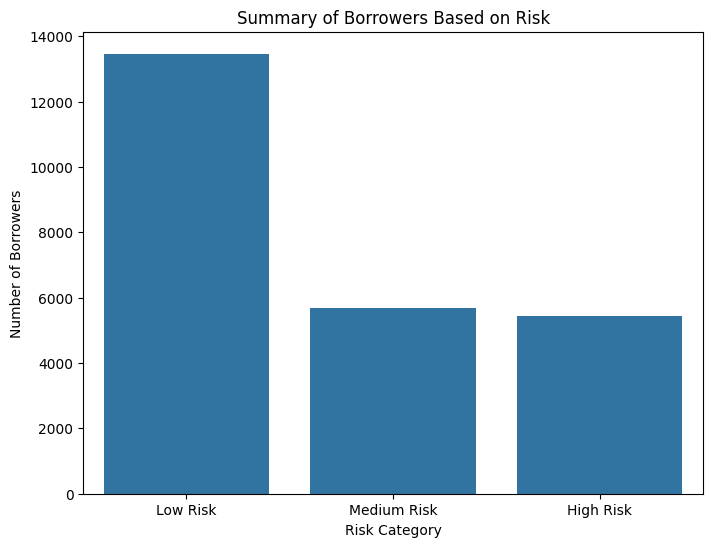

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary of borrowers based on risk
risk_summary = df['risk_category'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=risk_summary.index, y=risk_summary.values)
plt.title('Summary of Borrowers Based on Risk')
plt.xlabel('Risk Category')
plt.ylabel('Number of Borrowers')
plt.show()


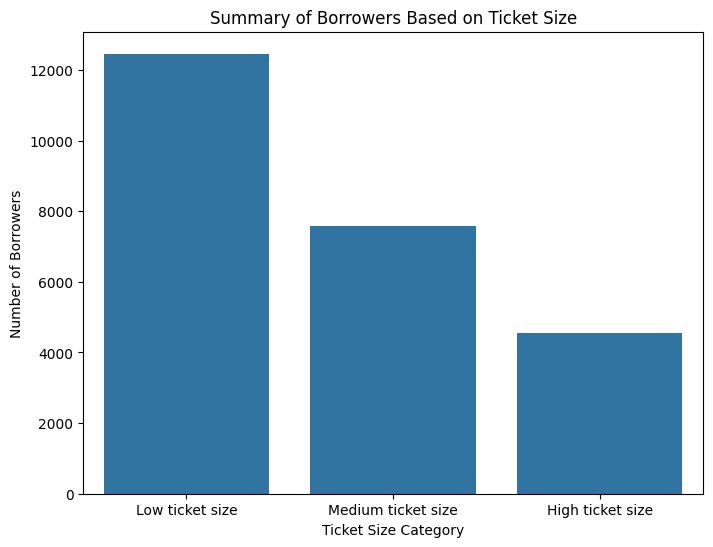

In [43]:
# Summary of borrowers based on ticket sizes
ticket_size_summary = df['ticket_size_label'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=ticket_size_summary.index, y=ticket_size_summary.values)
plt.title('Summary of Borrowers Based on Ticket Size')
plt.xlabel('Ticket Size Category')
plt.ylabel('Number of Borrowers')
plt.show()

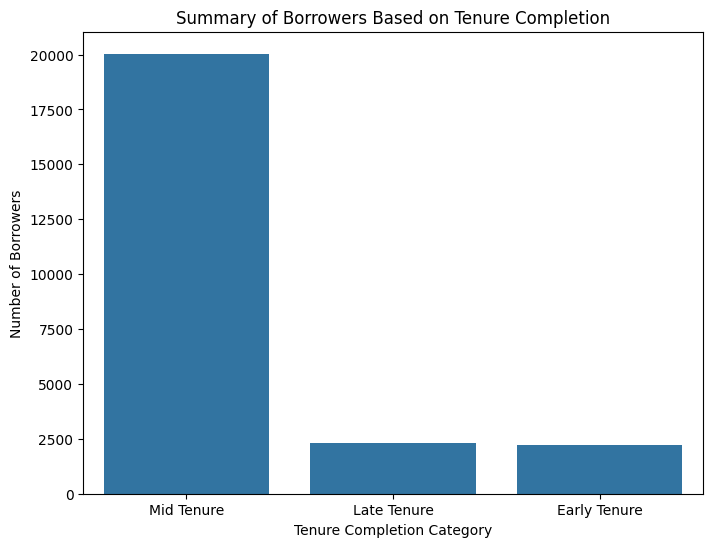

In [44]:
# Summary of borrowers based on tenure completion
tenure_summary = df['tenure_label'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=tenure_summary.index, y=tenure_summary.values)
plt.title('Summary of Borrowers Based on Tenure Completion')
plt.xlabel('Tenure Completion Category')
plt.ylabel('Number of Borrowers')
plt.show()